In [1]:
#Visualização de Sistema de Processamento
!nvidia-smi

Thu Jun  1 00:10:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Instalação das bibliotecas necessárias

# Instalação de Lib para YoloV8 
!pip install ultralytics

# Instalação da Lib - Roboflow, onde serão chamados os datasets de base
!pip install roboflow --quiet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.1/593.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00


In [3]:
# Importando as libs necessárias
 
from ultralytics import YOLO
from IPython.display import display, Image

In [4]:
# Importe para integração e aplicação do Sistema Operacional
import os

# Retorna o diretório de trabalho atual (current working directory), que é o diretório em que o script Python está sendo executado,e define a ele o valor da variável HOME 
HOME = os.getcwd()
print(HOME)


/content


In [5]:
# Cria na HOME o arquivo em pasta que irá abrigar o "dataset" 
!mkdir {HOME}/dataset

# Acessa a pasta "dataset"
%cd {HOME}/dataset



# Importa lib Roboflow
from roboflow import Roboflow

# Definição de chaves e propriedades de comunicação com o dataset do Roboflow (api_key, nome da área de trabalho e nome do projeto) 
rf = Roboflow(api_key="lXW0Eii94q1D4pndbud0")
project = rf.workspace("final-year-project-zorqg").project("plants-diseases-detection-model")
dataset = project.version(8).download("yolov8")


/content/dataset
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.112, to fix: `pip install ultralytics<=8.0.20`

Extracting Dataset Version Zip to Plants-Diseases-Detection-Model-8 in yolov8:: 100%|██████████| 5962/5962 [00:01<00:00, 3016.28it/s]


In [6]:
# Treinamento do modelo de aprendizado 

%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=6 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 110MB/s]
Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/dataset/Plants-Diseases-Detection-Model-8/data.yaml, epochs=6, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

In [7]:
# Visualização dos Modelos Treinados
!ls {HOME}/runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1685578595.d1476e7439c1.2226.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


/content


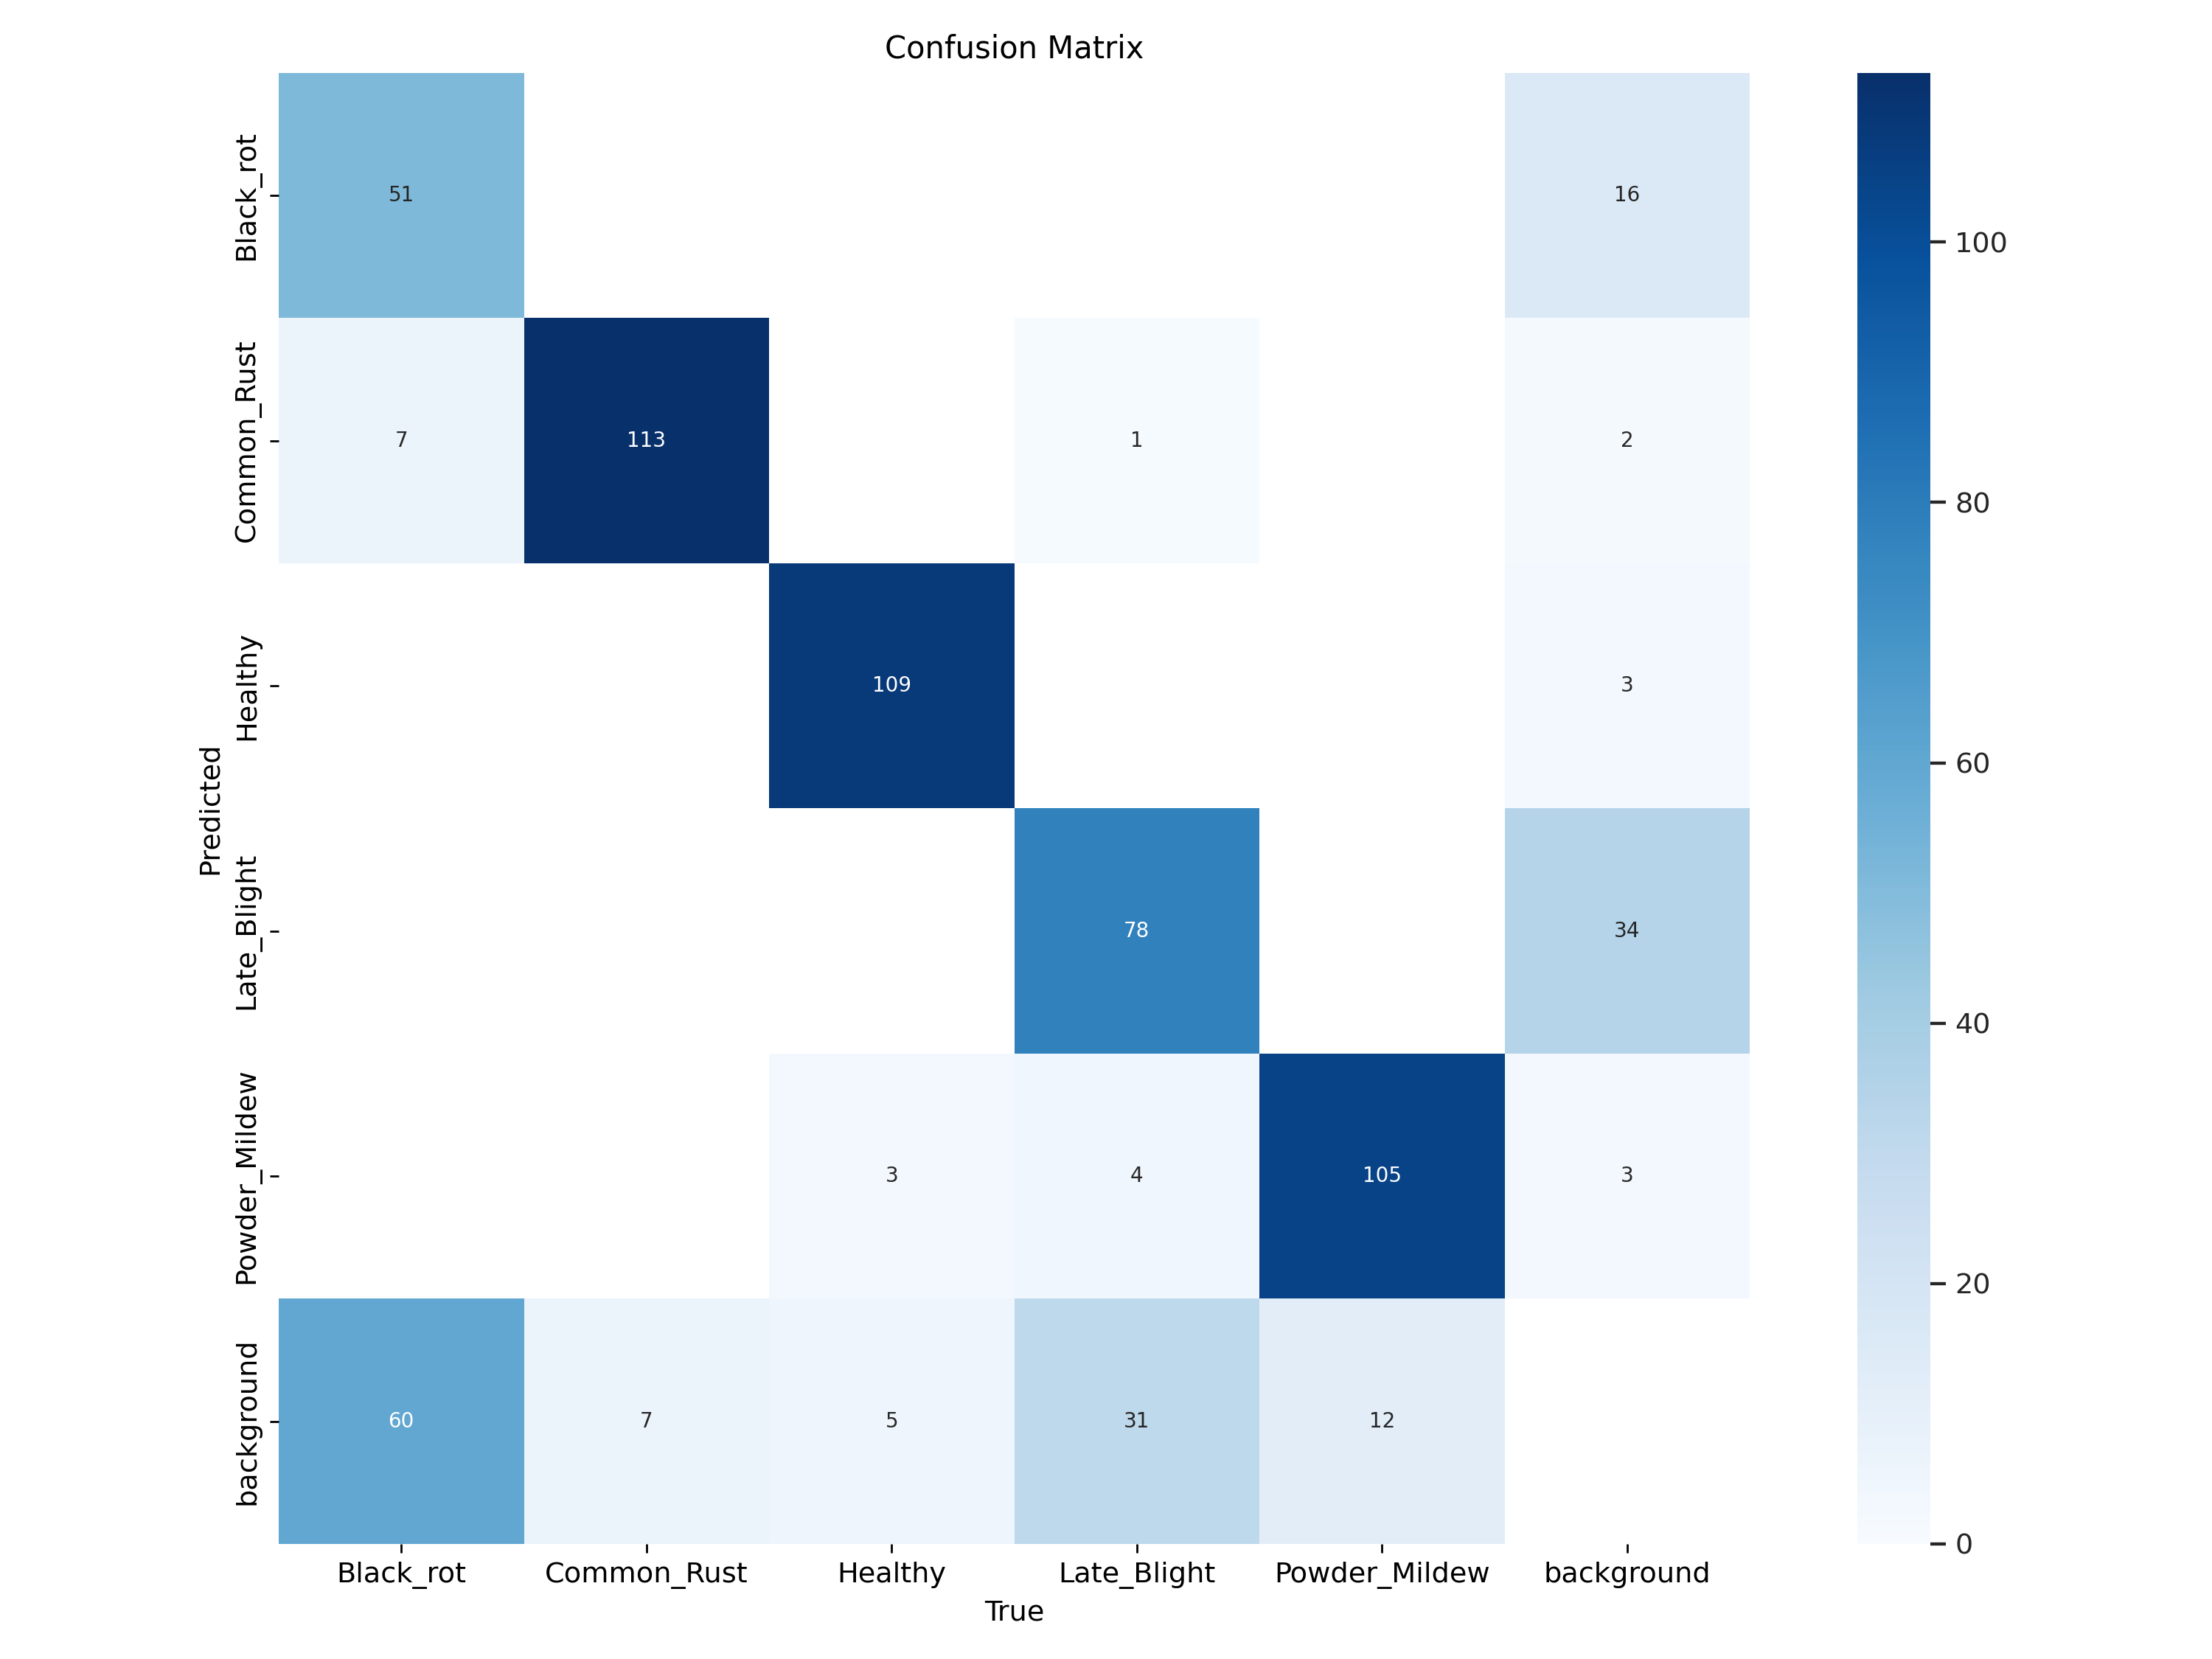

In [8]:
# Visualização da relação entre cada um dos datasets - Modelo, Treino e Predição
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


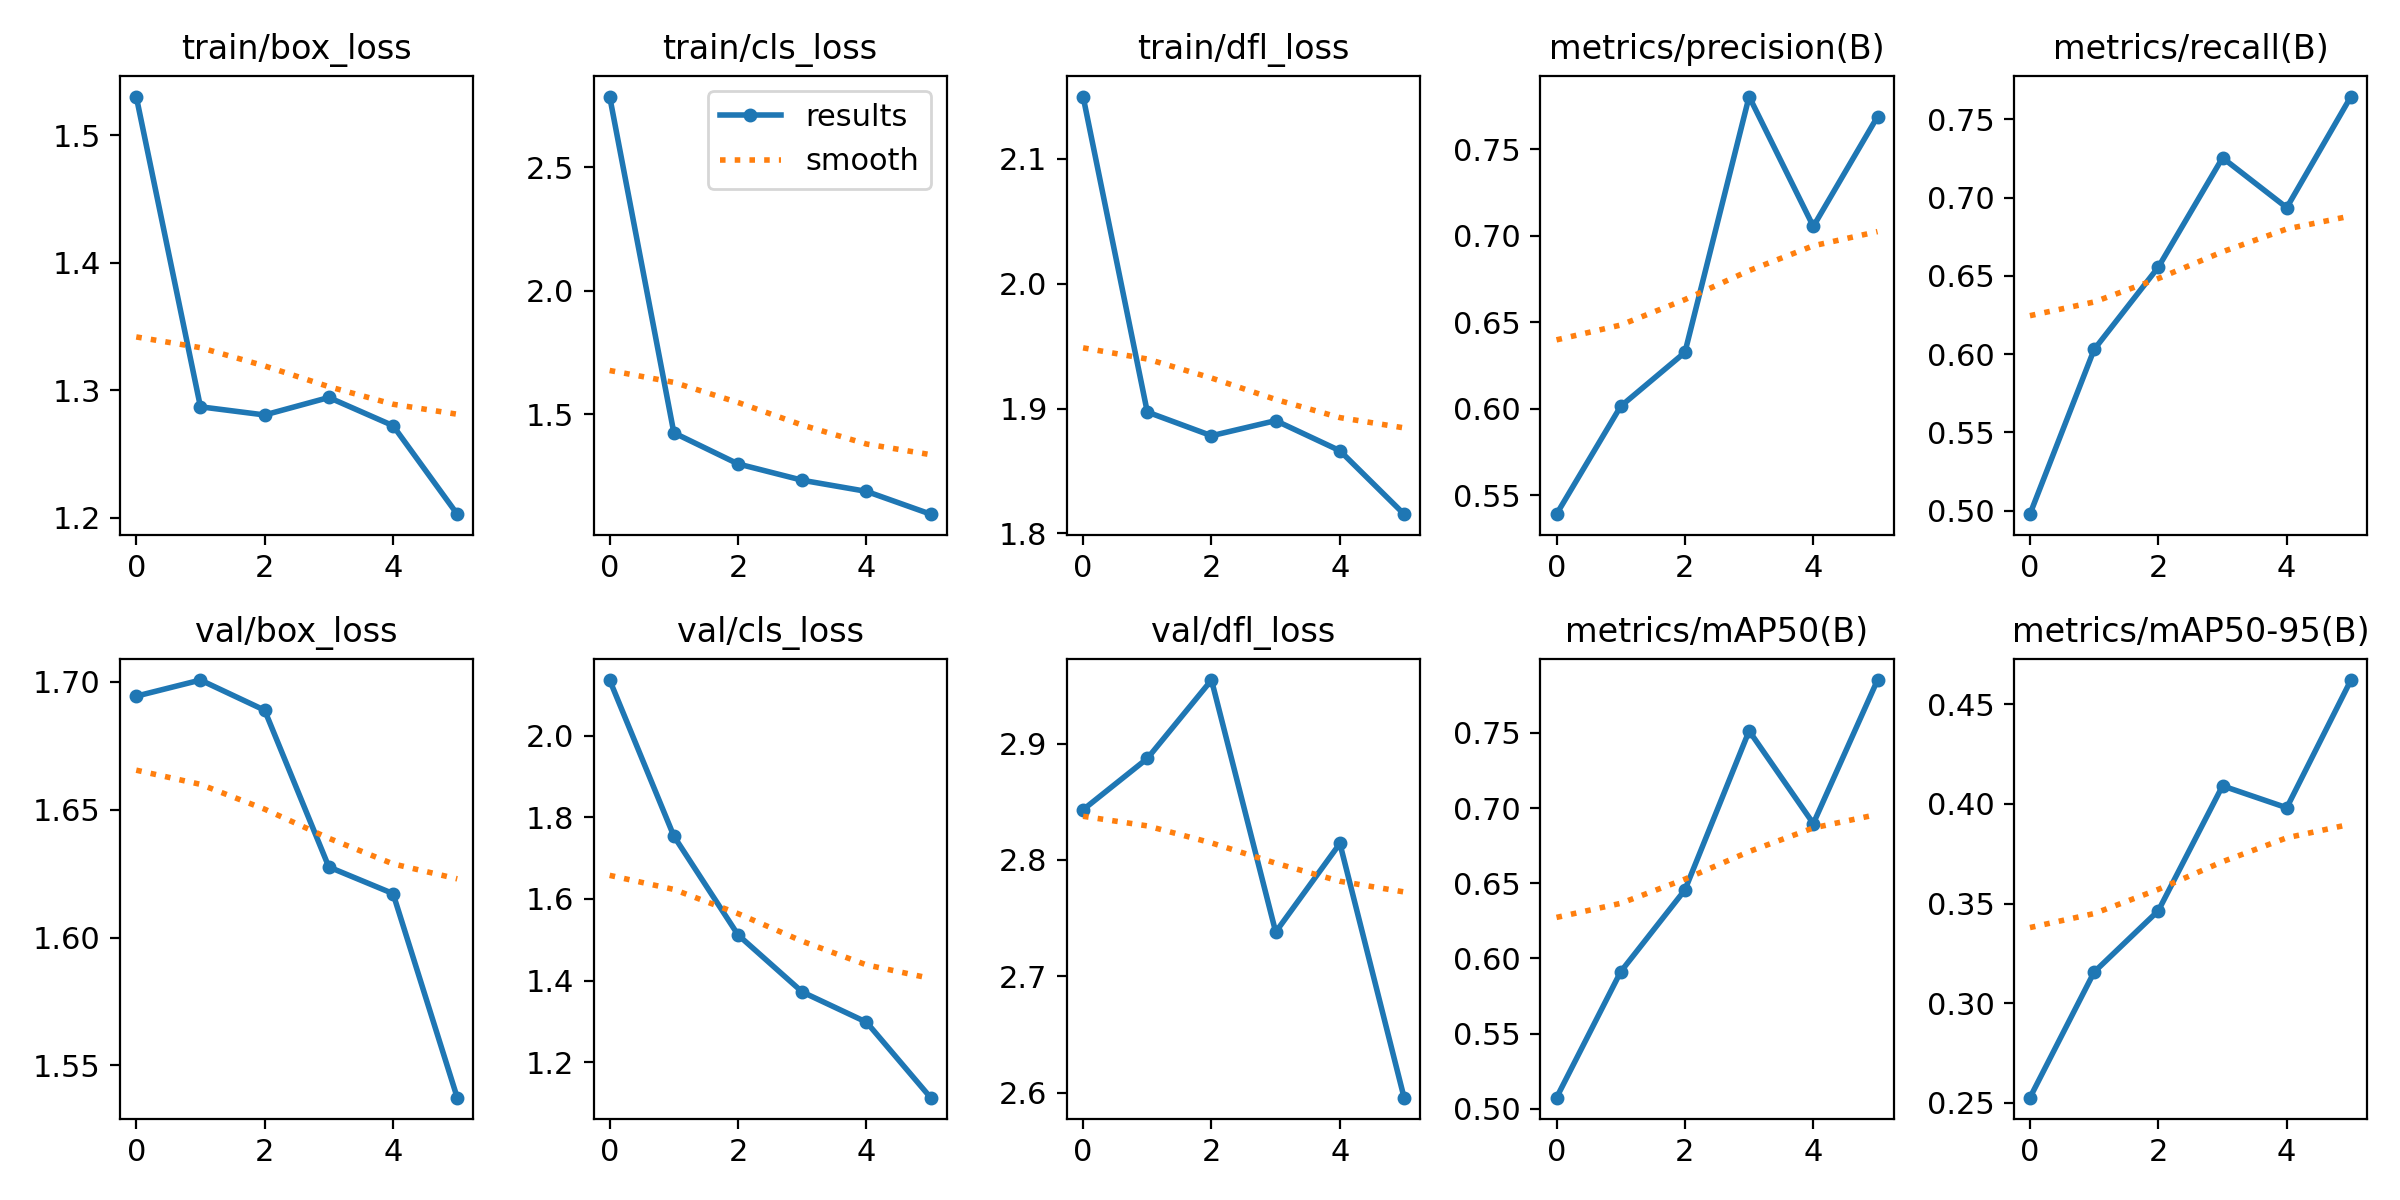

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


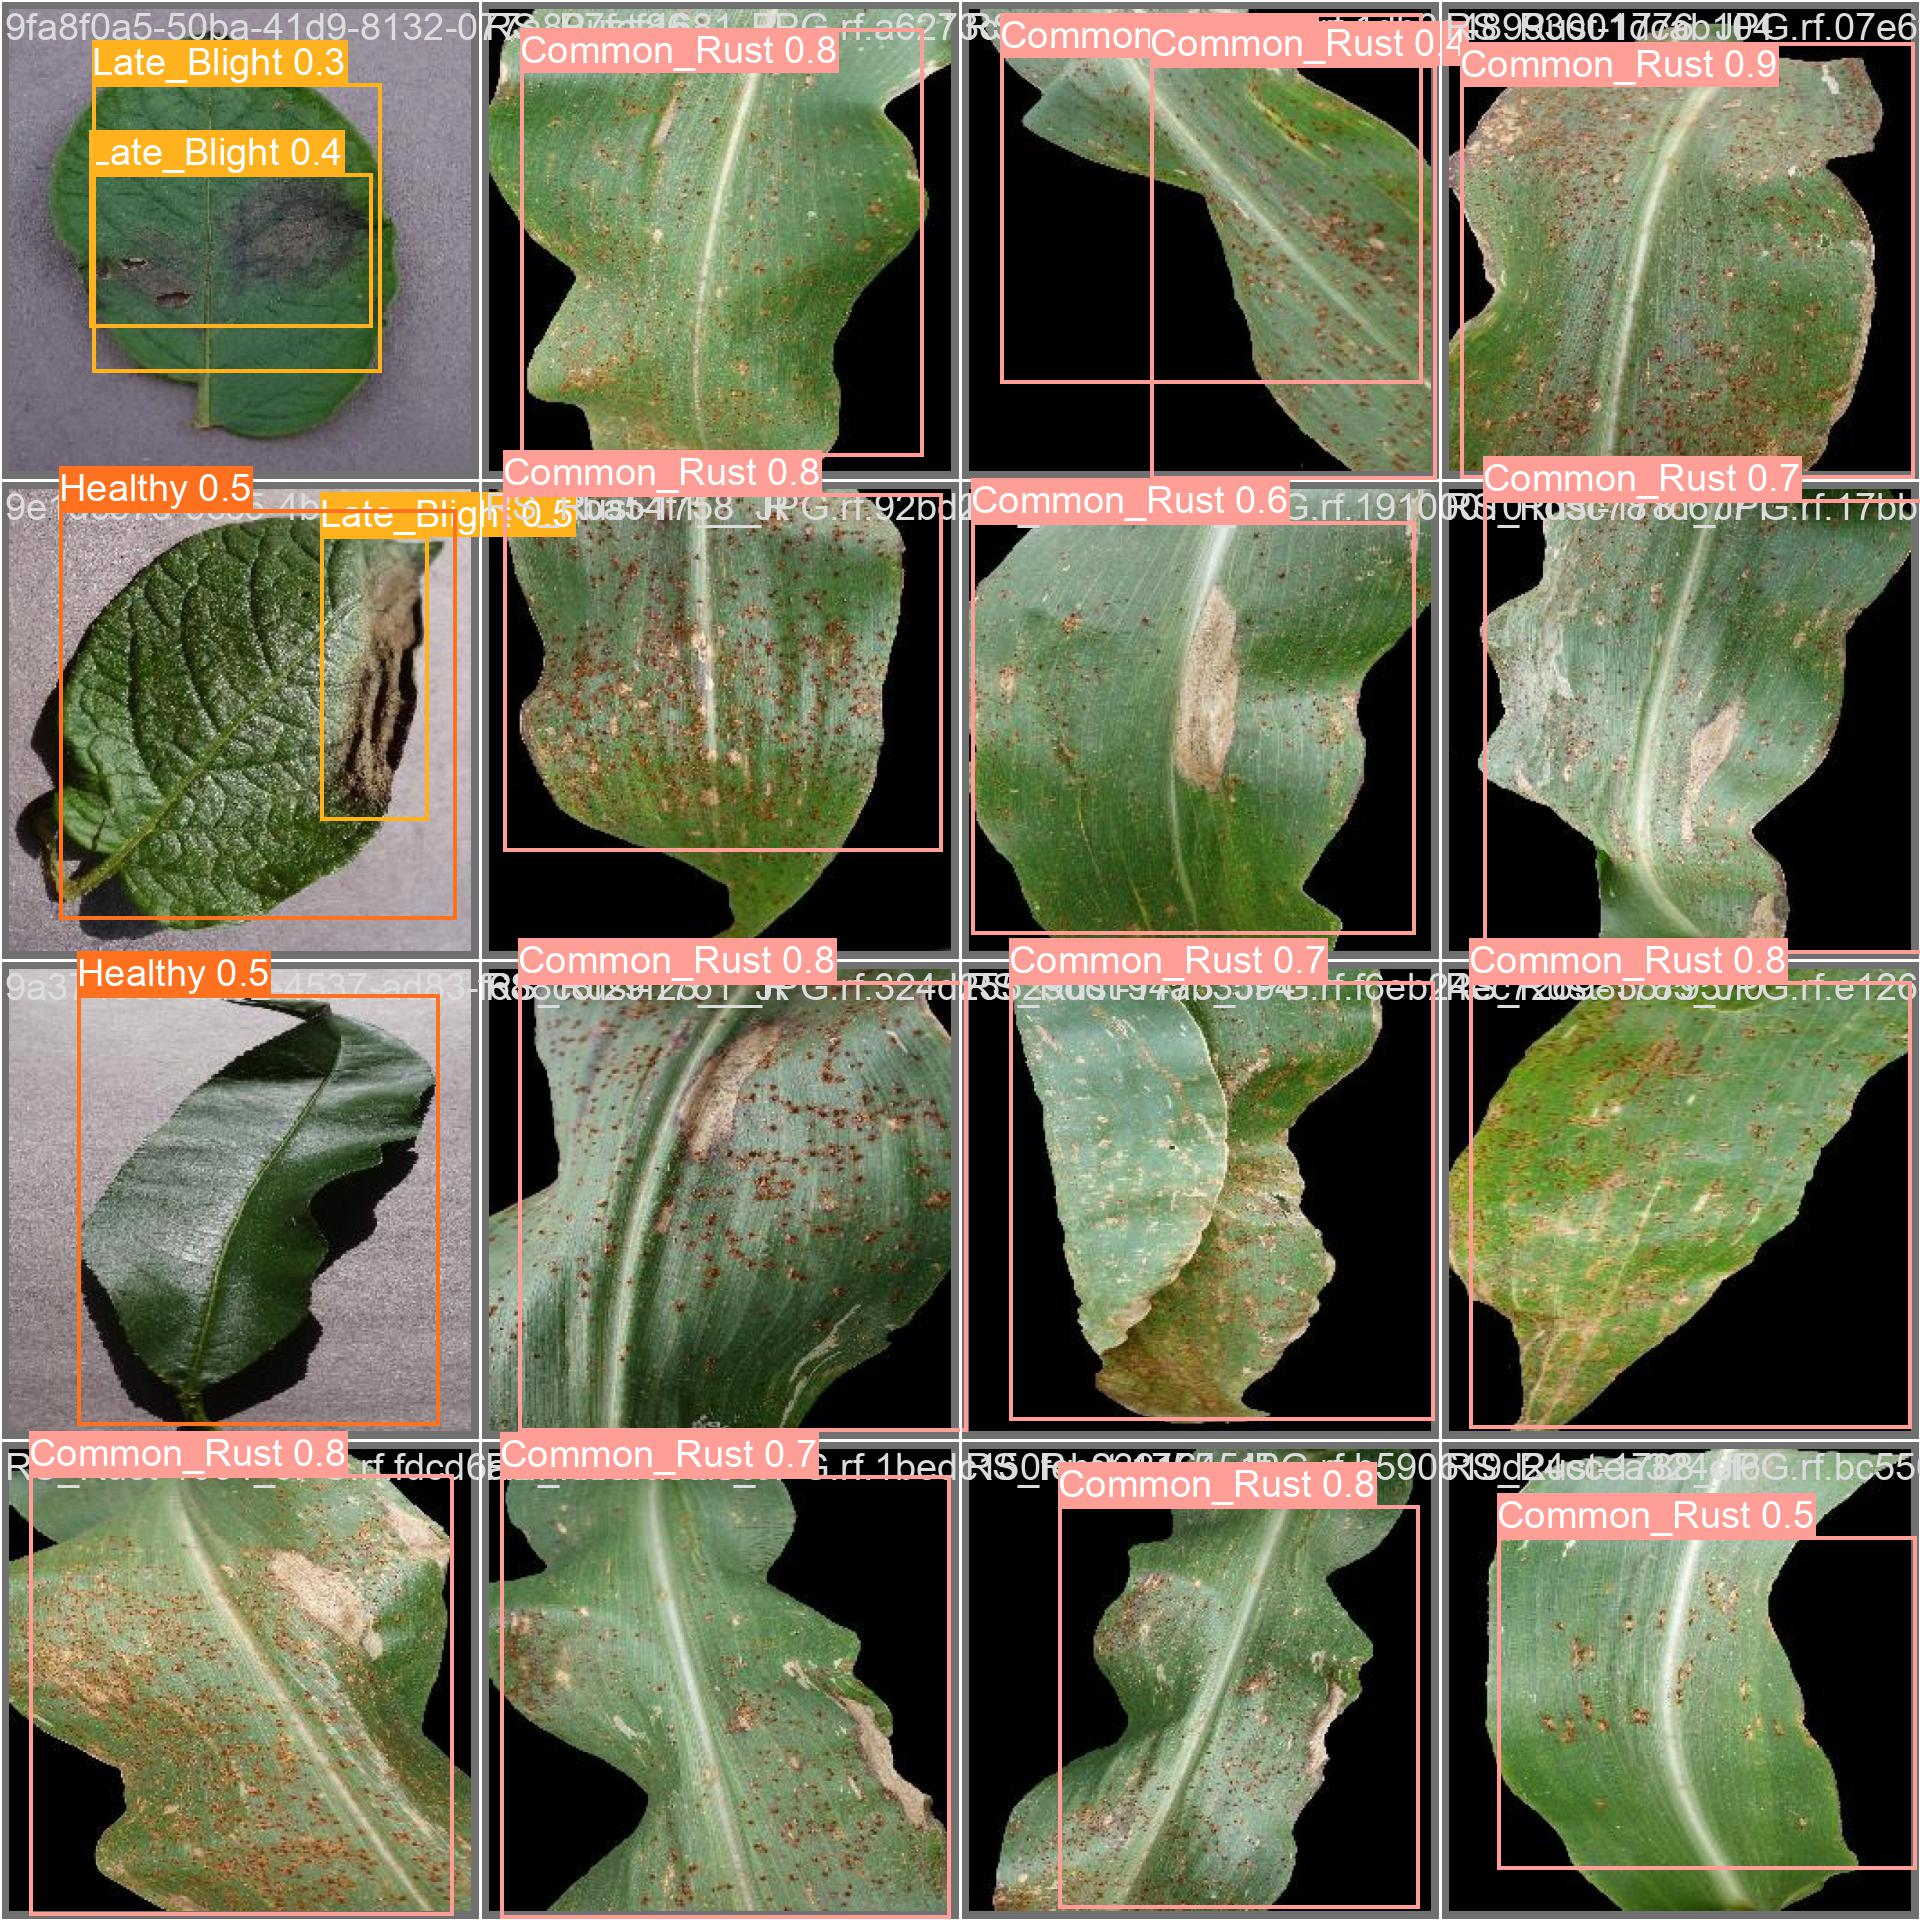

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients
val: Scanning /content/dataset/Plants-Diseases-Detection-Model-8/valid/labels.cache... 578 images, 0 backgrounds, 0 corrupt: 100% 578/578 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 37/37 [00:14<00:00,  2.54it/s]
                   all        578        586       0.77      0.765      0.785      0.462
             Black_rot        578        118      0.582      0.432      0.521      0.231
           Common_Rust        578        120      0.866      0.925      0.908      0.577
               Healthy        578        117      0.931      0.919      0.962      0.655
           Late_Blight        578        114      0.612      0.667      0.656      0.288
         Powder_Mildew        578        117      0.858       0.88      0.876      0.561
Speed: 0.7ms preproc

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients

image 1/341 /content/dataset/Plants-Diseases-Detection-Model-8/test/images/00a90bbc-a12c-426d-bcc8-fadb371ea6d0___UMD_Powd-M-0358_JPG.rf.3ab2dfe3431ac86eb080f17308e5f36e.jpg: 800x800 2 Powder_Mildews, 25.6ms
image 2/341 /content/dataset/Plants-Diseases-Detection-Model-8/test/images/00f09c0e-8129-4e1b-8b55-020c633beaf0___RS_HL-3934_JPG.rf.ef74f773be128e6407fb363af4f81c5f.jpg: 800x800 1 Healthy, 24.7ms
image 3/341 /content/dataset/Plants-Diseases-Detection-Model-8/test/images/01bcc9a4-db47-41ba-9ad1-5a379a8d6696___UMD_Powd-M-0259_JPG.rf.3c92c981223ea5fcb9dfe7fdda6357be.jpg: 800x800 1 Powder_Mildew, 24.7ms
image 4/341 /content/dataset/Plants-Diseases-Detection-Model-8/test/images/01dd93b0-0e34-447b-87ea-ccc9f2b62d03___JR_HL-8005_JPG.rf.c0b55d2a645d6e3083705e608bb3f3f4.jpg: 800x800 1 Healthy, 24.7ms
image 5/341 /content/datase

# Detectando em Imagens Internas do Dataset

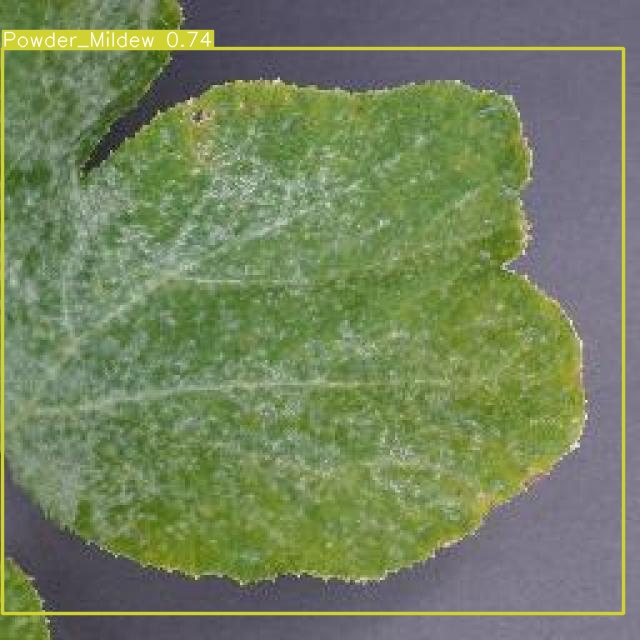

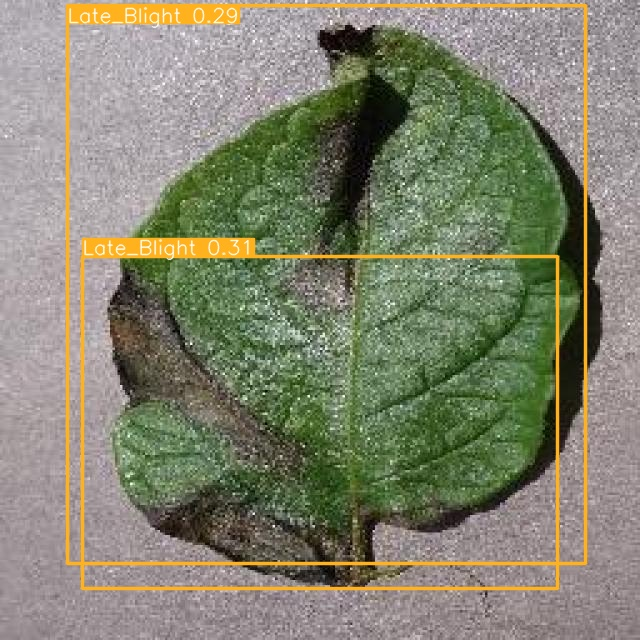

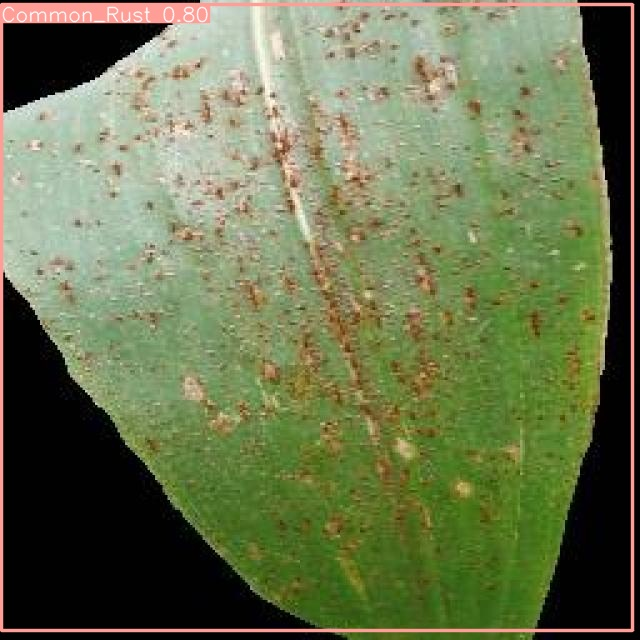

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# Detectando em Imagens Externas do Dataset

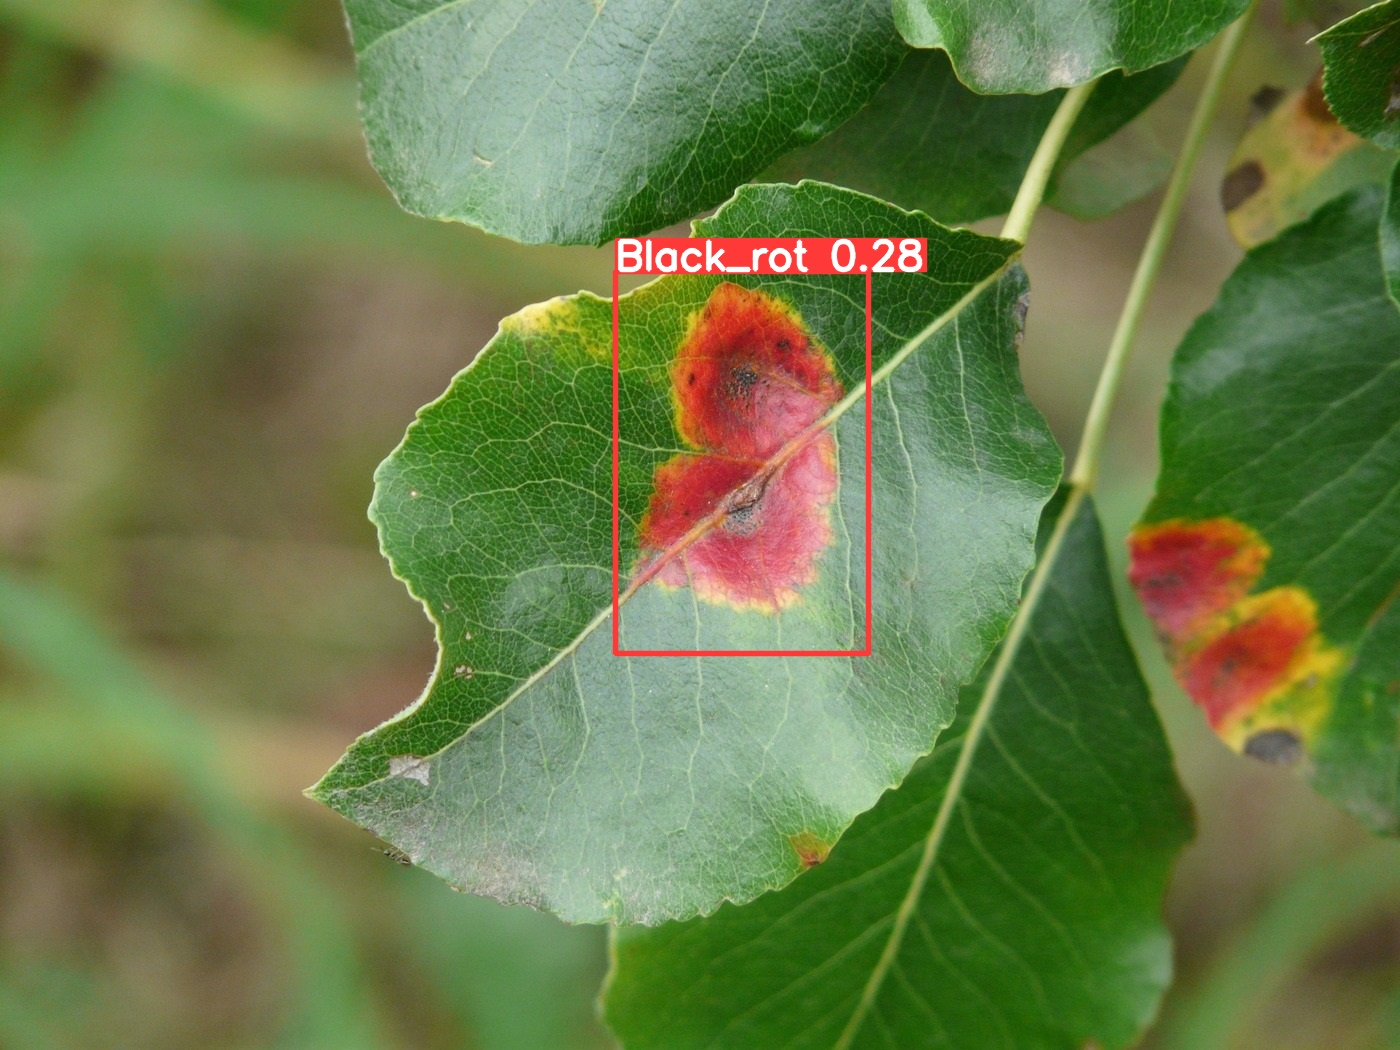

In [21]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict/plantas-doencas.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

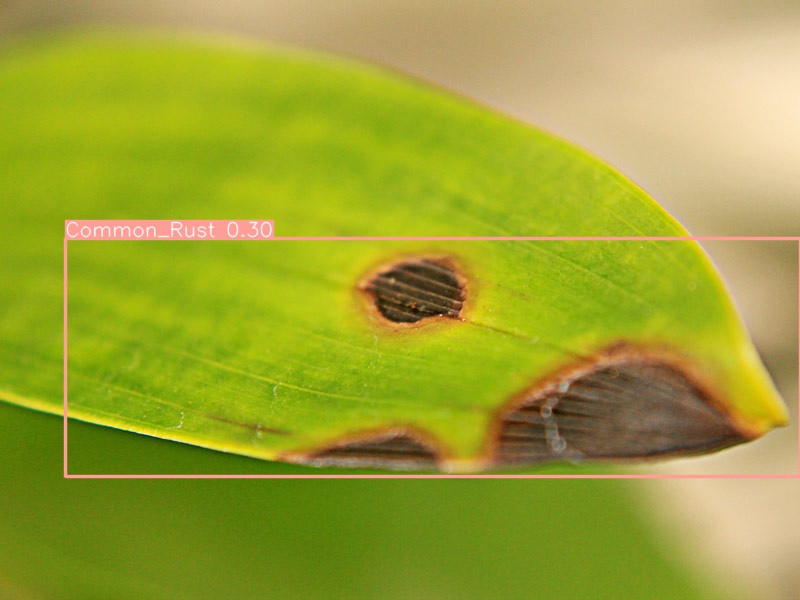

In [23]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict/planta-doente3.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

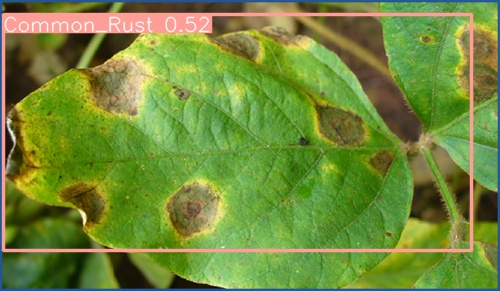

In [24]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict/planta-doente4.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")